In [1]:
import pandas as pd, numpy as np
import random

# Operaciones con Fechas

### 1. Uso del Módulo `datetime`

El módulo `datetime` en la biblioteca estándar de Python proporciona clases para manipular fechas y horas. 

#### Ejmplo: Crear y manipular Fechas. 

In [2]:
from datetime import datetime, timedelta

In [3]:
#Fecha y hora actual. 
now=datetime.now()
print("fecha y hr ctual",now)

fecha y hr ctual 2024-07-04 19:41:36.159406


In [4]:
#fecha específica 
spec_date=datetime(2021,12,25)
print("fh específica",spec_date)

fh específica 2021-12-25 00:00:00


In [6]:
#sumar días a una fecha: 
fh_nueva=spec_date + timedelta(days=10)
print("fh_nueva:",fh_nueva)

fh_nueva: 2022-01-04 00:00:00


In [7]:
#Diferencias de fechas
dif_fhs=now-spec_date
print("Diferencia fechas",dif_fhs)

Diferencia fechas 922 days, 19:41:36.159406


### 2. Uso de fechas en `pandas`

Pandas es útil para manejar datos de series de tiempo. Puedes analizar fechas de varios formatos y proporciona funcionalidades para manipular y agregar datos en series de tiempo de manera eficiente. 

In [13]:
#Creando un DataFrame con fechas
df=pd.DataFrame({
    'fecha':['2021-01-01','2021-01-02','2021-01-03','2021-01-10','2021-01-25','2021-01-30','2021-02-10','2021-02-15','2021-02-20'],
    'valor':[10,20,30,10,10,10,5,5,5]
    
})

In [14]:
df

,fecha,valor
0,2021-01-01,10
1,2021-01-02,20
2,2021-01-03,30
3,2021-01-10,10
4,2021-01-25,10
5,2021-01-30,10
6,2021-02-10,5
7,2021-02-15,5
8,2021-02-20,5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fecha   9 non-null      object
 1   valor   9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 276.0+ bytes


In [16]:
#Convirtiendo la columna 'fecha' en datetime
df['fecha']=pd.to_datetime(df['fecha'])

In [17]:
df

,fecha,valor
0,2021-01-01,10
1,2021-01-02,20
2,2021-01-03,30
3,2021-01-10,10
4,2021-01-25,10
5,2021-01-30,10
6,2021-02-10,5
7,2021-02-15,5
8,2021-02-20,5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   9 non-null      datetime64[ns]
 1   valor   9 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 276.0 bytes


In [19]:
#Ponerlo como índice (útil para operaciones de Series de Tiempo)
df.set_index('fecha',inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2021-01-01 to 2021-02-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   valor   9 non-null      int64
dtypes: int64(1)
memory usage: 144.0 bytes


In [24]:
df.head(2)

,valor
fecha,
2021-01-01,10
2021-01-02,20


In [22]:
#Re-muestreo (por ejemplo, agregando datos mensuales) 'M' significa mes. Agrupa por mes y suma. 
datos_mensuales=df.resample('M').sum()
print(datos_mensuales)

            valor
fecha            
2021-01-31     90
2021-02-28     15


In [ ]:
#Seleccionar fechas de diferentes formas

In [27]:
df.loc["2021-01-01"]

valor    10
Name: 2021-01-01 00:00:00, dtype: int64

In [32]:
df.loc["01-01-2021"]

valor    10
Name: 2021-01-01 00:00:00, dtype: int64

In [28]:
df.loc["20210101"]

valor    10
Name: 2021-01-01 00:00:00, dtype: int64

In [29]:
df.loc["2021/01/01"]

valor    10
Name: 2021-01-01 00:00:00, dtype: int64

In [30]:
df.loc[datetime(2021,1,1)]

valor    10
Name: 2021-01-01 00:00:00, dtype: int64

In [31]:
df.loc[datetime(2021,1,1):"2021-01-01"]

,valor
fecha,
2021-01-01,10


In [35]:
#Ejercicio Rápido
#input como string (cadena)
input_date_str="07/04/2024" #MM/DD/YYY 4 de Julio 
#une el objetivo como cadena en un objeto datetime
date_obj=datetime.strptime(input_date_str,"%m/%d/%Y")
#le damos el formato de datetime al objeto como lo deseamos. 
output_date_str=date_obj.strftime("%Y-%m-%d")

print("Fecha Original:",input_date_str)
print("Fecha con Formato:",output_date_str)

Fecha Original: 07/04/2024
Fecha con Formato: 2024-07-04


In [41]:
date_obj

datetime.datetime(2024, 4, 7, 0, 0)

In [46]:
dt=datetime(2024,4,7,0,0)

In [43]:
type(date_obj)

datetime.datetime

In [47]:
pd.to_datetime(dt).to_datetime64()

numpy.datetime64('2024-04-07T00:00:00.000000000')

In [36]:
#Ejercicio Rápido
#input como string (cadena)
input_date_str="07/04/2024" #DD/MM/YYY 7 de Abril 
#une el objetivo como cadena en un objeto datetime
date_obj=datetime.strptime(input_date_str,"%d/%m/%Y") #parse time from string
#le damos el formato de datetime al objeto como lo deseamos. 
output_date_str=date_obj.strftime("%d-%m-%Y") #string Format time

print("Fecha Original:",input_date_str)
print("Fecha con Formato:",output_date_str) 

Fecha Original: 07/04/2024
Fecha con Formato: 07-04-2024


In [39]:
date_obj

datetime.datetime(2024, 4, 7, 0, 0)

In [40]:
date_obj+ timedelta(days=20) #demostrar que si le suma 20 días al 7 de Abril llego al 27 de Abirl 

datetime.datetime(2024, 4, 27, 0, 0)

In [ ]:
#función que se llema .to_datetime64()

# 3. Rango de Fechas y Frecuencias. 
Pandas también permite generar rangos de fechas y convertir frecuencias (periodicidad de los datos)

#### Ejemplo: Generar Rangos de Fechas

In [48]:
#Generando un rango de fechas
#crear un índice de fechas
rango_fechas=pd.date_range(start='2021/01/01',end='2022/01/08',freq='D')
print(rango_fechas)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-30', '2021-12-31', '2022-01-01', '2022-01-02',
               '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08'],
              dtype='datetime64[ns]', length=373, freq='D')


In [49]:
#Convertir a mensual
rango_mensual=rango_fechas.to_period('M')
print(rango_mensual)
#es como extraer el mes y año

PeriodIndex(['2021-01', '2021-01', '2021-01', '2021-01', '2021-01', '2021-01',
             '2021-01', '2021-01', '2021-01', '2021-01',
             ...
             '2021-12', '2021-12', '2022-01', '2022-01', '2022-01', '2022-01',
             '2022-01', '2022-01', '2022-01', '2022-01'],
            dtype='period[M]', length=373)


In [50]:
pd.Series(rango_fechas)

0     2021-01-01
1     2021-01-02
2     2021-01-03
3     2021-01-04
4     2021-01-05
         ...    
368   2022-01-04
369   2022-01-05
370   2022-01-06
371   2022-01-07
372   2022-01-08
Length: 373, dtype: datetime64[ns]

In [51]:
pd.Series(rango_mensual)

0      2021-01
1      2021-01
2      2021-01
3      2021-01
4      2021-01
        ...   
368    2022-01
369    2022-01
370    2022-01
371    2022-01
372    2022-01
Length: 373, dtype: period[M]

Se puede definir también un rango de fecha de la forma `pd.date_range(start='fh_inicio',periods=k,freq='X')`

In [53]:
#Se recomienda usar también pd.TimeDelta de pandas. 

#Timedelta de 3 días. 
td=pd.Timedelta(days=3)

df=pd.DataFrame({'fecha': pd.date_range(start='2021-01-01',periods=5,freq='D')})
df['date_plus_3days']=df['fecha']+td
df

,fecha,date_plus_3days
0,2021-01-01,2021-01-04
1,2021-01-02,2021-01-05
2,2021-01-03,2021-01-06
3,2021-01-04,2021-01-07
4,2021-01-05,2021-01-08


In [56]:
df["fecha"][0].weekday() #viernes

4

#### 'Shifting' de fecha (a menudo útil en series de tiempo

In [59]:
data={
    'fecha':pd.date_range(start='2021-01-01',periods=5,freq='D'),
    'valor':[10,20,15,30,25]
}

df=pd.DataFrame(data)
df

,fecha,valor
0,2021-01-01,10
1,2021-01-02,20
2,2021-01-03,15
3,2021-01-04,30
4,2021-01-05,25


### Operción Desplazamiento
Desplazaremos la columna 'valor' hacia abajo (hacia adelante en el tiempo) un perído. 

In [60]:
#Deslplazar la columna ' valor' hacia abajo un día (un registro) 
df['valor_+1d']=df['valor'].shift(1) 
df['valor_+2d']=df['valor'].shift(2)
df['valor_-1d']=df['valor'].shift(-1)
df['valor_-2d']=df['valor'].shift(-2)


df

,fecha,valor,valor_+1d,valor_+2d,valor_-1d,valor_-2d
0,2021-01-01,10,NaN,NaN,20.0,15.0
1,2021-01-02,20,10.0,NaN,15.0,30.0
2,2021-01-03,15,20.0,10.0,30.0,25.0
3,2021-01-04,30,15.0,20.0,25.0,NaN
4,2021-01-05,25,30.0,15.0,NaN,NaN


In [61]:
#una aplicación de esto en series de tiempo, podría ser calcular rendimiento diarios. 
#NaN No es número. #Nat No es Time. 
# (Valor Final - Valor Inicial) / Valor Inicial =    (Valor Final/Valor Inicial)-1
df['valor']/df['valor_+1d']-1  

0         NaN
1    1.000000
2   -0.250000
3    1.000000
4   -0.166667
dtype: float64

In [62]:
df['valor'].pct_change()

0         NaN
1    1.000000
2   -0.250000
3    1.000000
4   -0.166667
Name: valor, dtype: float64

In [63]:
df['año']=df['fecha'].dt.year
df['mes']=df['fecha'].dt.month
df['dia']=df['fecha'].dt.day
df['dia_semana']=df['fecha'].dt.day_name()
df

,fecha,valor,valor_+1d,valor_+2d,valor_-1d,valor_-2d,año,mes,dia,dia_semana
0,2021-01-01,10,NaN,NaN,20.0,15.0,2021,1,1,Friday
1,2021-01-02,20,10.0,NaN,15.0,30.0,2021,1,2,Saturday
2,2021-01-03,15,20.0,10.0,30.0,25.0,2021,1,3,Sunday
3,2021-01-04,30,15.0,20.0,25.0,NaN,2021,1,4,Monday
4,2021-01-05,25,30.0,15.0,NaN,NaN,2021,1,5,Tuesday


In [74]:
## ejemplo de remuestreo con agregación semanal
data={
    'fecha':pd.date_range(start='2021-01-01', periods=15,freq='D'),
    'valor':[10,20,15,30,25,40,35,30,20,10,50,45,35,25,40]
}
#Crear el DatFrame
df=pd.DataFrame(data)
df.head()

,fecha,valor
0,2021-01-01,10
1,2021-01-02,20
2,2021-01-03,15
3,2021-01-04,30
4,2021-01-05,25


In [75]:
#primero set_index: 
df.set_index('fecha',inplace=True)

In [76]:
df.head(2)

,valor
fecha,
2021-01-01,10
2021-01-02,20


<Axes: xlabel='fecha'>

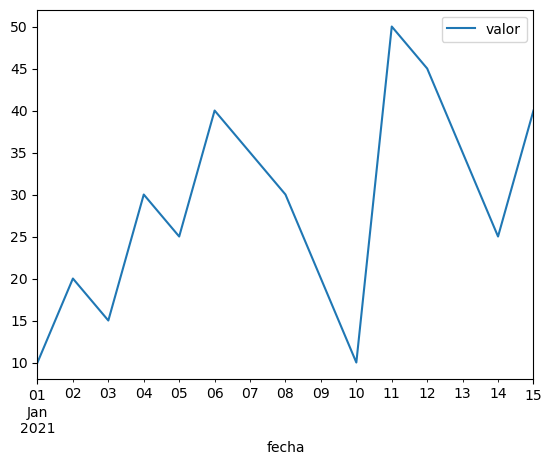

In [78]:
df.plot()

In [68]:
suma_semanal=df.resample('W').sum()
suma_semanal

,valor
fecha,
2021-01-03,45
2021-01-10,190
2021-01-17,195


In [ ]:
#quitar la parte de las horas y se pueden quedar con las fechas

In [70]:
df=pd.DataFrame({
'datetime_column':pd.to_datetime(['2021-01-01 15:30','2021-01-02 12:45','2021-01-03 09:15'])
    
})
df

,datetime_column
0,2021-01-01 15:30:00
1,2021-01-02 12:45:00
2,2021-01-03 09:15:00


In [72]:
#Convirtiendo datetime a solo date
df['date_column']=df['datetime_column'].dt.date
df

,datetime_column,date_column
0,2021-01-01 15:30:00,2021-01-01
1,2021-01-02 12:45:00,2021-01-02
2,2021-01-03 09:15:00,2021-01-03


In [73]:
#pueden hacer date_range para miutos y horas. 
pd.date_range(start='2024-01-01 00:00',end='2024-01-02 00:00', freq='H')

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 01:00:00',
               '2024-01-01 02:00:00', '2024-01-01 03:00:00',
               '2024-01-01 04:00:00', '2024-01-01 05:00:00',
               '2024-01-01 06:00:00', '2024-01-01 07:00:00',
               '2024-01-01 08:00:00', '2024-01-01 09:00:00',
               '2024-01-01 10:00:00', '2024-01-01 11:00:00',
               '2024-01-01 12:00:00', '2024-01-01 13:00:00',
               '2024-01-01 14:00:00', '2024-01-01 15:00:00',
               '2024-01-01 16:00:00', '2024-01-01 17:00:00',
               '2024-01-01 18:00:00', '2024-01-01 19:00:00',
               '2024-01-01 20:00:00', '2024-01-01 21:00:00',
               '2024-01-01 22:00:00', '2024-01-01 23:00:00',
               '2024-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='H')